<a href="https://colab.research.google.com/github/Jonny-T87/Dojo-Projects/blob/main/1st_NBATrends_Project_2_Part_4_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project 2 - NBA Dataset

Jonny Tesfahun

- 07/14/22

1. Source of data

 - https://www.kaggle.com/datasets/nathanlauga/nba-games?select=ranking.csv

 - using games.csv file 

2. Brief description of data

 - The data is a collection of NBA Final games data from the 2004 season to dec 2020 season. The file contains all games home and away data. Some of these include home points, away points, FG percent home & away, FT percent home & away.
 
3. What is the target?
 - My target for this dataset would be Home_Team_Wins

4. Is this a classification or regression problem?
 - This is a classification problem. I hope to be using linear regression.

5. How many features?
 - There will be many features. They main features include Pts_home, Fg_pct_home, Fg3_pct_home, Ast_home, Reb_home, Pts_away, and Fg_pct_away. 

6. How many rows of data.
 - As many needed for the machine to learn and better predict.

7. What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
 - The first challenge may be that there might not be the strongest correlation between target and features. 
 - The second challenge would increasing accuracy without decreasing performance, such as loading time and taxing CPU. 


##Dataset: Loading Data & Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import calendar

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
#NBA dataset loading
df = pd.read_csv('/content/drive/MyDrive/DojoBootCamp/Project Files/games.csv')
df.head()

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
0    2022-03-12  22101005            Final    1610612748       1610612750   
1    2022-03-12  22101006            Final    1610612741       1610612739   
2    2022-03-12  22101007            Final    1610612759       1610612754   
3    2022-03-12  22101008            Final    1610612744       1610612749   
4    2022-03-12  22101009            Final    1610612743       1610612761   

   SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  AST_home  \
0    2021    1610612748     104.0        0.398        0.760  ...      23.0   
1    2021    1610612741     101.0        0.443        0.933  ...      20.0   
2    2021    1610612759     108.0        0.412        0.813  ...      28.0   
3    2021    1610612744     122.0        0.484        0.933  ...      33.0   
4    2021    1610612743     115.0        0.551        0.750  ...      32.0   

   REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  FG3_PCT_away  \
0      53.0    1610612750     113.0        0.422        0.875         0.357   
1      46.0    1610612739      91.0        0.419        0.824         0.208   
2      52.0    1610612754     119.0        0.489        1.000         0.389   
3      55.0    1610612749     109.0        0.413        0.696         0.386   
4      39.0    1610612761     127.0        0.471        0.760         0.387   

   AST_away  REB_away  HOME_TEAM_WINS  
0      21.0      46.0               0  
1      19.0      40.0               1  
2      23.0      47.0               0  
3      27.0      39.0               1  
4      28.0      50.0               0  

[5 rows x 21 columns]

In [3]:
#Using original data to create a predictive model with target as Home Team Wins
#Grouped data by Home Team Id and sorted by Game Date
#Than removed the first value of Home Team Wins and moved each value up one
teams = df['HOME_TEAM_ID'].unique()
sorted_teams = pd.DataFrame()

for team in teams:
    team_df = df.loc[df['HOME_TEAM_ID'] == team, :].sort_values(by='GAME_DATE_EST')
    team_df['HOME_TEAM_WINS'] = team_df['HOME_TEAM_WINS'].shift(-1)
    sorted_teams = sorted_teams.append(team_df)

sorted_teams.head() 


GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
18429    2003-10-07  10300007            Final    1610612748       1610612755   
18407    2003-10-10  10300023            Final    1610612748       1610612737   
18384    2003-10-14  10300049            Final    1610612748       1610612759   
18347    2003-10-21  10300092            Final    1610612748       1610612763   
18295    2003-10-31  20300020            Final    1610612748       1610612765   

       SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  \
18429    2003    1610612748      86.0        0.352        0.647  ...   
18407    2003    1610612748       NaN          NaN          NaN  ...   
18384    2003    1610612748       NaN          NaN          NaN  ...   
18347    2003    1610612748       NaN          NaN          NaN  ...   
18295    2003    1610612748      81.0        0.357        0.769  ...   

       AST_home  REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  \
18429      15.0      55.0    1610612755      79.0        0.329        0.897   
18407       NaN       NaN    1610612737       NaN          NaN          NaN   
18384       NaN       NaN    1610612759       NaN          NaN          NaN   
18347       NaN       NaN    1610612763       NaN          NaN          NaN   
18295      14.0      43.0    1610612765      93.0        0.435        0.800   

       FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS  
18429         0.143       7.0      44.0             0.0  
18407           NaN       NaN       NaN             0.0  
18384           NaN       NaN       NaN             0.0  
18347           NaN       NaN       NaN             0.0  
18295         0.357      15.0      40.0             0.0  

[5 rows x 21 columns]

In [4]:
#Checking dataset infos
sorted_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25796 entries, 18429 to 96
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     25796 non-null  object 
 1   GAME_ID           25796 non-null  int64  
 2   GAME_STATUS_TEXT  25796 non-null  object 
 3   HOME_TEAM_ID      25796 non-null  int64  
 4   VISITOR_TEAM_ID   25796 non-null  int64  
 5   SEASON            25796 non-null  int64  
 6   TEAM_ID_home      25796 non-null  int64  
 7   PTS_home          25697 non-null  float64
 8   FG_PCT_home       25697 non-null  float64
 9   FT_PCT_home       25697 non-null  float64
 10  FG3_PCT_home      25697 non-null  float64
 11  AST_home          25697 non-null  float64
 12  REB_home          25697 non-null  float64
 13  TEAM_ID_away      25796 non-null  int64  
 14  PTS_away          25697 non-null  float64
 15  FG_PCT_away       25697 non-null  float64
 16  FT_PCT_away       25697 non-null  float

In [5]:
#checking what correlation is for target and features
sorted_teams.corr()

GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID    SEASON  \
GAME_ID          1.000000     -0.026348        -0.031471  0.095721   
HOME_TEAM_ID    -0.026348      1.000000        -0.045911  0.000461   
VISITOR_TEAM_ID -0.031471     -0.045911         1.000000  0.002195   
SEASON           0.095721      0.000461         0.002195  1.000000   
TEAM_ID_home    -0.026348      1.000000        -0.045911  0.000461   
PTS_home         0.033727     -0.024372        -0.000120  0.345022   
FG_PCT_home      0.018384     -0.008239         0.035072  0.039355   
FT_PCT_home      0.036256     -0.009983         0.004108  0.065950   
FG3_PCT_home    -0.004041      0.002748         0.017292  0.024126   
AST_home        -0.032486     -0.097061         0.018287  0.192337   
REB_home        -0.006294     -0.026674        -0.002759  0.162529   
TEAM_ID_away    -0.031471     -0.045911         1.000000  0.002195   
PTS_away         0.004002     -0.006496        -0.032583  0.378888   
FG_PCT_away      0.005716      0.022197        -0.026651  0.073299   
FT_PCT_away      0.033366      0.016042        -0.018476  0.066808   
FG3_PCT_away    -0.002642      0.015525        -0.022625  0.020564   
AST_away        -0.042501     -0.066744        -0.013180  0.255330   
REB_away        -0.024355     -0.025784        -0.010262  0.199832   
HOME_TEAM_WINS   0.026299     -0.024147        -0.001032 -0.028954   

                 TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  \
GAME_ID             -0.026348  0.033727     0.018384     0.036256   
HOME_TEAM_ID         1.000000 -0.024372    -0.008239    -0.009983   
VISITOR_TEAM_ID     -0.045911 -0.000120     0.035072     0.004108   
SEASON               0.000461  0.345022     0.039355     0.065950   
TEAM_ID_home         1.000000 -0.024372    -0.008239    -0.009983   
PTS_home            -0.024372  1.000000     0.661964     0.184323   
FG_PCT_home         -0.008239  0.661964     1.000000     0.018565   
FT_PCT_home         -0.009983  0.184323     0.018565     1.000000   
FG3_PCT_home         0.002748  0.423277     0.449595     0.028656   
AST_home            -0.097061  0.601088     0.549268     0.018711   
REB_home            -0.026674  0.163020    -0.188445    -0.052373   
TEAM_ID_away        -0.045911 -0.000120     0.035072     0.004108   
PTS_away            -0.006496  0.483321     0.114863     0.075251   
FG_PCT_away          0.022197  0.128207     0.039905     0.046824   
FT_PCT_away          0.016042  0.069504     0.030386     0.036861   
FG3_PCT_away         0.015525  0.057260     0.014223     0.021528   
AST_away            -0.066744  0.208445     0.013061     0.029812   
REB_away            -0.025784 -0.139219    -0.464576    -0.115124   
HOME_TEAM_WINS      -0.024147  0.053138     0.065984     0.018979   

                 FG3_PCT_home  AST_home  REB_home  TEAM_ID_away  PTS_away  \
GAME_ID             -0.004041 -0.032486 -0.006294     -0.031471  0.004002   
HOME_TEAM_ID         0.002748 -0.097061 -0.026674     -0.045911 -0.006496   
VISITOR_TEAM_ID      0.017292  0.018287 -0.002759      1.000000 -0.032583   
SEASON               0.024126  0.192337  0.162529      0.002195  0.378888   
TEAM_ID_home         0.002748 -0.097061 -0.026674     -0.045911 -0.006496   
PTS_home             0.423277  0.601088  0.163020     -0.000120  0.483321   
FG_PCT_home          0.449595  0.549268 -0.188445      0.035072  0.114863   
FT_PCT_home          0.028656  0.018711 -0.052373      0.004108  0.075251   
FG3_PCT_home         1.000000  0.351811 -0.087723      0.017292  0.046740   
AST_home             0.351811  1.000000  0.066332      0.018287  0.183636   
REB_home            -0.087723  0.066332  1.000000     -0.002759 -0.152464   
TEAM_ID_away         0.017292  0.018287 -0.002759      1.000000 -0.032583   
PTS_away             0.046740  0.183636 -0.152464     -0.032583  1.000000   
FG_PCT_away          0.008265  0.006043 -0.474556     -0.026651  0.669054   
FT_PCT_away          0.015199  0.026035 -0.115795     -0.018476  0.201684   
FG3_

##Dataset: Cleaning

In [6]:
#looking to see what to drop based on unique data, that will not help model
sorted_teams.nunique()

GAME_DATE_EST        4149
GAME_ID             25767
GAME_STATUS_TEXT        1
HOME_TEAM_ID           30
VISITOR_TEAM_ID        30
SEASON                 19
TEAM_ID_home           30
PTS_home              100
FG_PCT_home           399
FT_PCT_home           403
FG3_PCT_home          427
AST_home               42
REB_home               55
TEAM_ID_away           30
PTS_away              106
FG_PCT_away           390
FT_PCT_away           380
FG3_PCT_away          409
AST_away               41
REB_away               52
HOME_TEAM_WINS          2
dtype: int64

In [7]:
#checking for duplicates 
sorted_teams.duplicated().sum()

0

In [8]:
#Checking for NaN in target or features
sorted_teams.isna().sum()

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS      30
dtype: int64

In [9]:
#the target data looks nicely balanced, but NaN needs to be removed
sorted_teams['HOME_TEAM_WINS'].value_counts()

1.0    15143
0.0    10623
Name: HOME_TEAM_WINS, dtype: int64

In [10]:
#dropping NaN from data set
sorted_teams = sorted_teams.dropna()

In [11]:
#Checking if dropped
sorted_teams.isna().sum()

GAME_DATE_EST       0
GAME_ID             0
GAME_STATUS_TEXT    0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home            0
FG_PCT_home         0
FT_PCT_home         0
FG3_PCT_home        0
AST_home            0
REB_home            0
TEAM_ID_away        0
PTS_away            0
FG_PCT_away         0
FT_PCT_away         0
FG3_PCT_away        0
AST_away            0
REB_away            0
HOME_TEAM_WINS      0
dtype: int64

In [12]:
#Looking for outliers in target and features, 
#Some crazy numbers like 50 ASt_home, 168 Pts home, and 72 Reb home but nothing unbelievable. Since it is team sport. 
sorted_teams.describe()

GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID        SEASON  \
count  2.566700e+04  2.566700e+04     2.566700e+04  25667.000000   
mean   2.173554e+07  1.610613e+09     1.610613e+09   2011.821522   
std    5.464030e+06  8.641456e+00     8.654951e+00      5.374625   
min    1.030000e+07  1.610613e+09     1.610613e+09   2003.000000   
25%    2.060116e+07  1.610613e+09     1.610613e+09   2007.000000   
50%    2.120044e+07  1.610613e+09     1.610613e+09   2012.000000   
75%    2.170070e+07  1.610613e+09     1.610613e+09   2016.000000   
max    5.200021e+07  1.610613e+09     1.610613e+09   2021.000000   

       TEAM_ID_home      PTS_home   FG_PCT_home   FT_PCT_home  FG3_PCT_home  \
count  2.566700e+04  25667.000000  25667.000000  25667.000000  25667.000000   
mean   1.610613e+09    103.095142      0.460301      0.759696      0.355899   
std    8.641456e+00     13.171882      0.056626      0.100691      0.111970   
min    1.610613e+09     36.000000      0.250000      0.143000      0.000000   
25%    1.610613e+09     94.000000      0.421000      0.696000      0.286000   
50%    1.610613e+09    103.000000      0.459000      0.765000      0.355000   
75%    1.610613e+09    112.000000      0.500000      0.829000      0.429000   
max    1.610613e+09    168.000000      0.684000      1.000000      1.000000   

          AST_home     REB_home  TEAM_ID_away      PTS_away   FG_PCT_away  \
count  25667.00000  25667.00000  2.566700e+04  25667.000000  25667.000000   
mean      22.73390     43.34484  1.610613e+09    100.277243      0.449239   
std        5.17666      6.62117  8.654951e+00     13.335830      0.055530   
min        6.00000     15.00000  1.610613e+09     33.000000      0.244000   
25%       19.00000     39.00000  1.610613e+09     91.000000      0.412000   
50%       23.00000     43.00000  1.610613e+09    100.000000      0.448000   
75%       26.00000     48.00000  1.610613e+09    109.000000      0.487000   
max       50.00000     72.00000  1.610613e+09    168.000000      0.687000   

        FT_PCT_away  FG3_PCT_away      AST_away      REB_away  HOME_TEAM_WINS  
count  25667.000000  25667.000000  25667.000000  25667.000000    25667.000000  
mean       0.758005      0.349422     21.399774     42.083298        0.589317  
std        0.103387      0.110230      5.139717      6.526976        0.491967  
min        0.143000      0.000000      4.000000     19.000000        0.000000  
25%        0.692000      0.278000     18.000000     38.000000        0.000000  
50%        0.765000      0.350000     21.000000     42.000000        1.000000  
75%        0.833000      0.421000     25.000000     46.000000        1.000000  
max        1.000000      1.000000     46.000000     81.000000        1.000000

##Multivariate Exploratory Visuals: 
- To further understand the data.

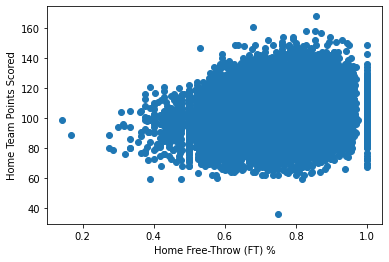

In [13]:
#A univariate visuals of Home team points based on FT %
plt.scatter(sorted_teams['FT_PCT_home'], sorted_teams['PTS_home'])
plt.xlabel('Home Free-Throw (FT) %')
plt.ylabel('Home Team Points Scored');

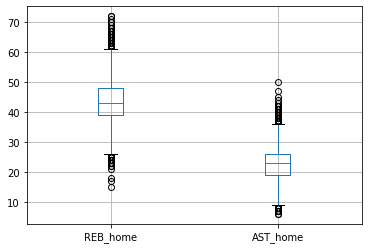

In [14]:
#Boxplot of home rebounds and home assists
boxplot = sorted_teams.boxplot(column= ['REB_home', 'AST_home']);

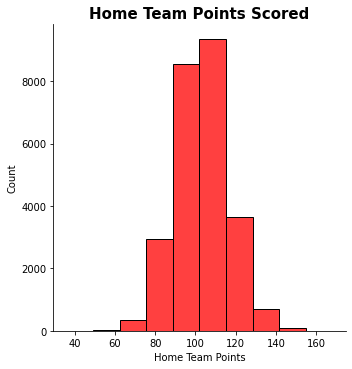

In [15]:
#seaborn displot of amount Home Team Points 
sns.displot(sorted_teams['PTS_home'], kde=False, bins=10, color='red')
plt.xlabel('Home Team Points')
plt.title('Home Team Points Scored', fontsize = 15, fontweight = 'bold');

##Feature Engineering Datetime:
- For month trends.

In [16]:
#Changing date from Object to datetime format
sorted_teams['GAME_DATE_EST'] = pd.to_datetime(sorted_teams['GAME_DATE_EST'])

In [17]:
#Featuring Enginering to find certain month points are scored more 
sorted_teams['GAME_month'] = sorted_teams['GAME_DATE_EST'].dt.month
sorted_teams['GAME_month']

18429    10
18295    10
18239    11
18211    11
18198    11
         ..
256       1
239       2
152       2
135       2
115       2
Name: GAME_month, Length: 25667, dtype: int64

In [18]:
sorted_teams.head()

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
18429    2003-10-07  10300007            Final    1610612748       1610612755   
18295    2003-10-31  20300020            Final    1610612748       1610612765   
18239    2003-11-08  20300077            Final    1610612748       1610612750   
18211    2003-11-12  20300106            Final    1610612748       1610612739   
18198    2003-11-14  20300117            Final    1610612748       1610612764   

       SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  \
18429    2003    1610612748      86.0        0.352        0.647  ...   
18295    2003    1610612748      81.0        0.357        0.769  ...   
18239    2003    1610612748      79.0        0.341        0.762  ...   
18211    2003    1610612748      88.0        0.455        0.765  ...   
18198    2003    1610612748     105.0        0.409        0.700  ...   

       REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  \
18429      55.0    1610612755      79.0        0.329        0.897   
18295      43.0    1610612765      93.0        0.435        0.800   
18239      40.0    1610612750      88.0        0.458        0.810   
18211      40.0    1610612739      83.0        0.451        0.567   
18198      53.0    1610612764     101.0        0.448        0.679   

       FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS  GAME_month  
18429         0.143       7.0      44.0             0.0          10  
18295         0.357      15.0      40.0             0.0          10  
18239         0.455      17.0      45.0             1.0          11  
18211         0.250      21.0      42.0             1.0          11  
18198         0.286      16.0      43.0             1.0          11  

[5 rows x 22 columns]

In [19]:
# Drop unnecessary columns
sorted_teams = sorted_teams.drop(columns= ['GAME_ID', 'GAME_STATUS_TEXT', 'VISITOR_TEAM_ID', 'TEAM_ID_home', 'TEAM_ID_away', 'FT_PCT_away'])


In [20]:
#checking columns are dropped, looks great 
sorted_teams.head()

GAME_DATE_EST  HOME_TEAM_ID  SEASON  PTS_home  FG_PCT_home  FT_PCT_home  \
18429    2003-10-07    1610612748    2003      86.0        0.352        0.647   
18295    2003-10-31    1610612748    2003      81.0        0.357        0.769   
18239    2003-11-08    1610612748    2003      79.0        0.341        0.762   
18211    2003-11-12    1610612748    2003      88.0        0.455        0.765   
18198    2003-11-14    1610612748    2003     105.0        0.409        0.700   

       FG3_PCT_home  AST_home  REB_home  PTS_away  FG_PCT_away  FG3_PCT_away  \
18429         0.222      15.0      55.0      79.0        0.329         0.143   
18295         0.111      14.0      43.0      93.0        0.435         0.357   
18239         0.438      15.0      40.0      88.0        0.458         0.455   
18211         0.385      21.0      40.0      83.0        0.451         0.250   
18198         0.400      19.0      53.0     101.0        0.448         0.286   

       AST_away  REB_away  HOME_TEAM_WINS  GAME_month  
18429       7.0      44.0             0.0          10  
18295      15.0      40.0             0.0          10  
18239      17.0      45.0             1.0          11  
18211      21.0      42.0             1.0          11  
18198      16.0      43.0             1.0          11

## Multivariate Presentation Visuals: 
- To visually explain trends and key findings of interest to stakeholders.

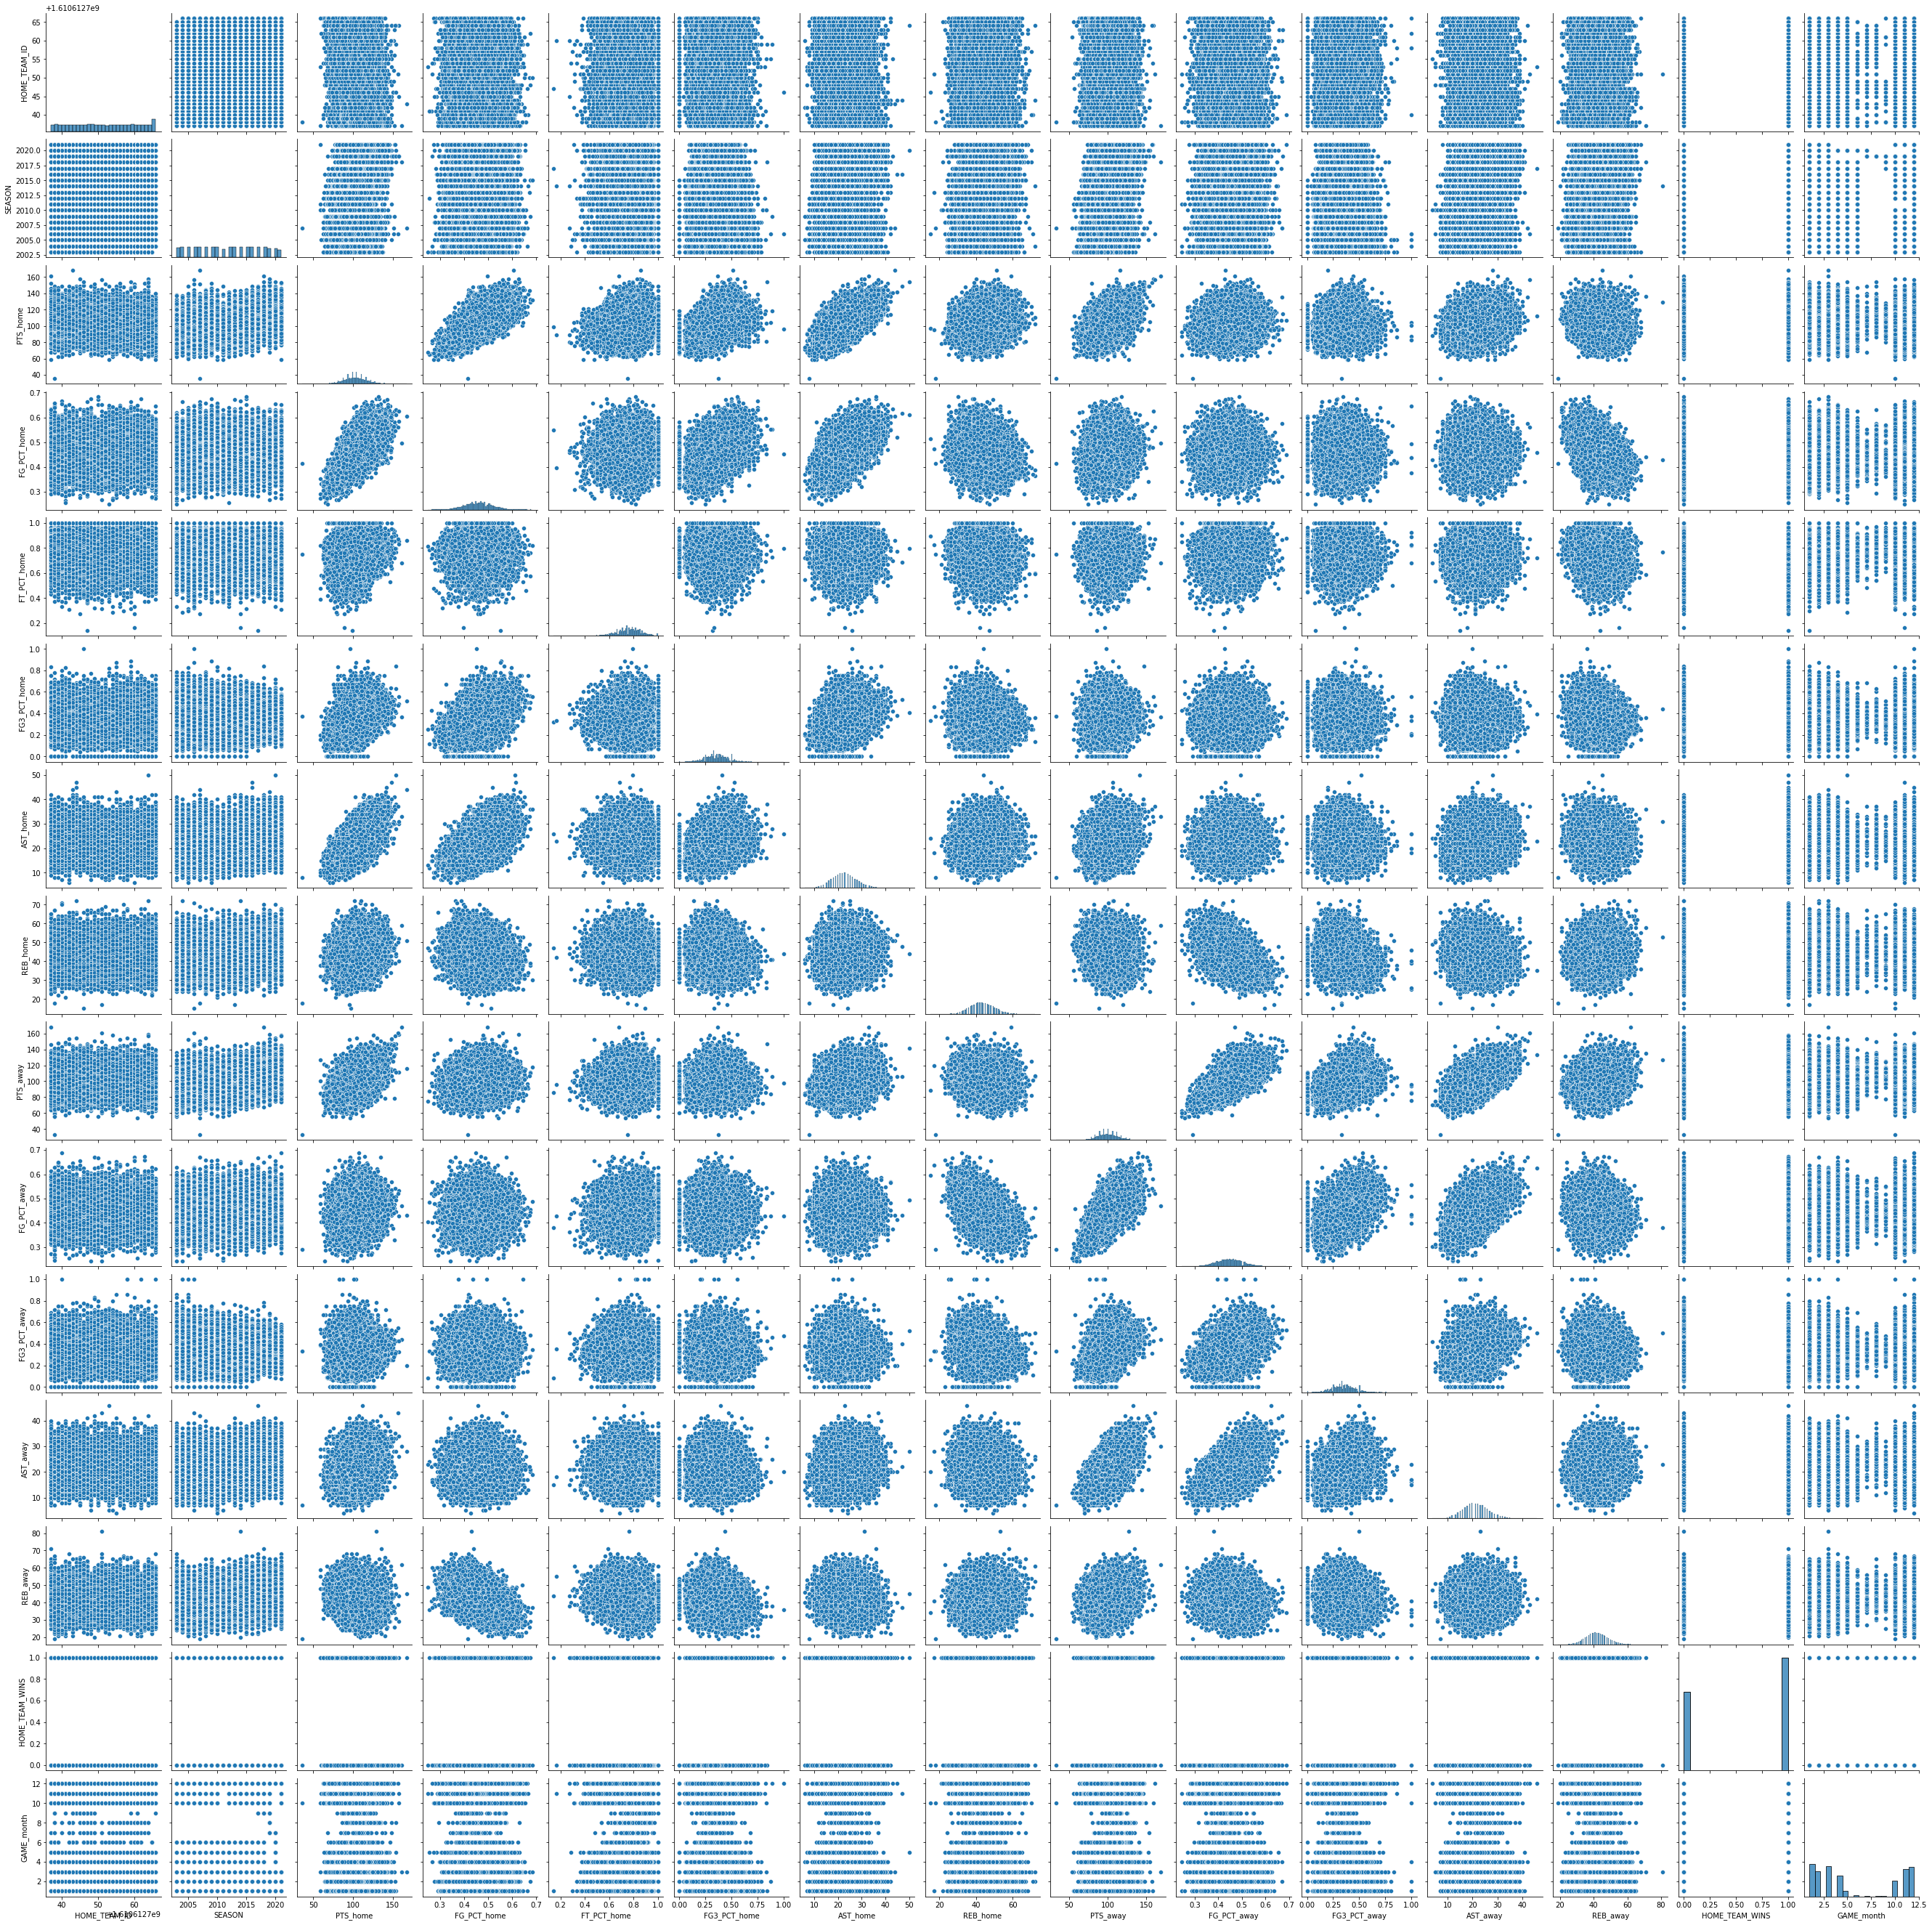

In [21]:
#seaborn pairplot of target and features
sns.pairplot(sorted_teams)

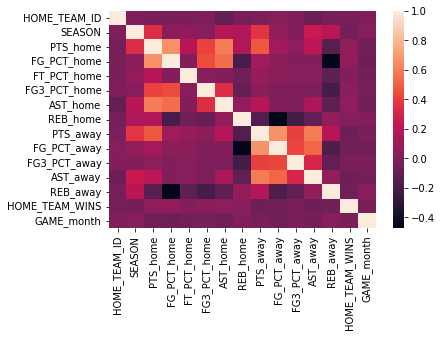

In [22]:
#Taking a look at correlation using seaborn heatmap
sns.heatmap(sorted_teams.corr())

No handles with labels found to put in legend.


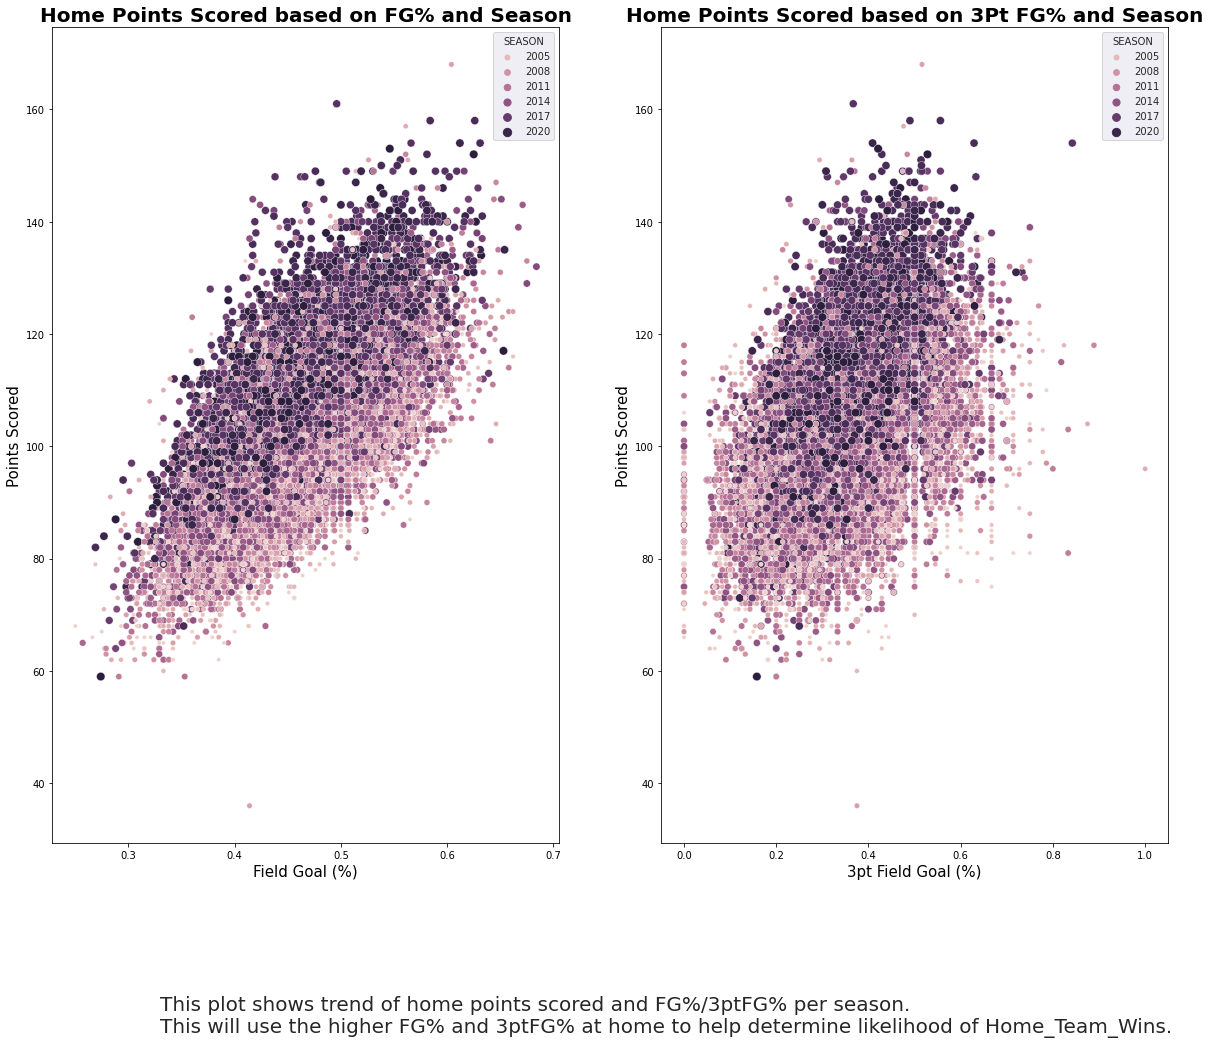

In [23]:
#Presentation #1 - FG and FG3pt correlation
fig, axes = plt.subplots(ncols=2, figsize=(20,15))
sns.set_style("dark")
sns.scatterplot(data=sorted_teams, x='FG_PCT_home', y='PTS_home', hue='SEASON', size='SEASON', ax=axes[0])
axes[0].set_title('Home Points Scored based on FG% and Season', fontsize = 20, fontweight = 'bold')
axes[0].set_xlabel('Field Goal (%)', fontsize = 15)
axes[0].set_ylabel('Points Scored', fontsize = 15)
plt.legend(title='Season (Yr)', bbox_to_anchor=(1.02, 1))

sns.scatterplot(data=sorted_teams, x='FG3_PCT_home', y='PTS_home', hue='SEASON', size='SEASON', ax=axes[1])
axes[1].set_title('Home Points Scored based on 3Pt FG% and Season', fontsize = 20, fontweight = 'bold')
axes[1].set_xlabel('3pt Field Goal (%)', fontsize = 15)
axes[1].set_ylabel('Points Scored', fontsize = 15)

plt.figtext(0.2, -0.05, "This plot shows trend of home points scored and FG%/3ptFG% per season. \nThis will use the higher FG% and 3ptFG% at home to help determine likelihood of Home_Team_Wins.", fontsize=20)

plt.tight_layout;

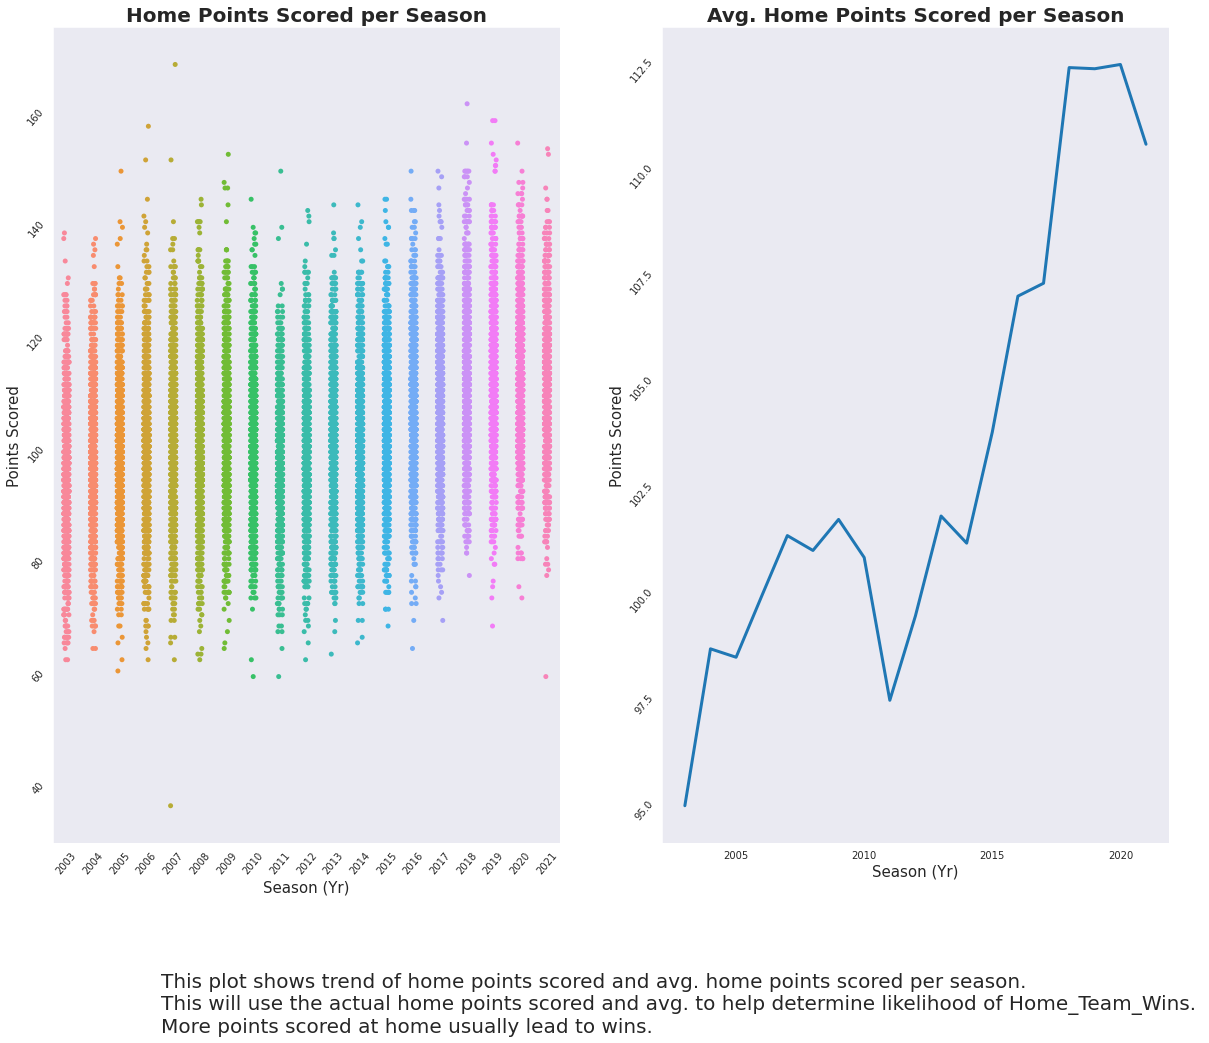

In [24]:
#Presentation #2 - Points and Avg. Points per Season Increase
fig, axes = plt.subplots(ncols=2, figsize=(20,15))
for ax in fig.axes:
    ax.tick_params(labelrotation=50)
#source for tick_param = https://stackoverflow.com/questions/19273040/rotating-axis-text-for-each-subplot

sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 5})
sns.stripplot(x="SEASON", y="PTS_home", data=sorted_teams, ax=axes[0])
axes[0].set_xlabel('Season (Yr)', fontsize = 15)
axes[0].set_ylabel('Points Scored', fontsize = 15)
axes[0].set_title('Home Points Scored per Season',  fontsize = 20, fontweight='bold')

sorted_teams.groupby('SEASON')['PTS_home'].mean().plot()
axes[1].set_title('Avg. Home Points Scored per Season', fontsize = 20, fontweight='bold')
axes[1].set_xlabel('Season (Yr)', fontsize = 15)
axes[1].set_ylabel('Points Scored', fontsize = 15)

plt.figtext(0.2, -0.05, "This plot shows trend of home points scored and avg. home points scored per season. \nThis will use the actual home points scored and avg. to help determine likelihood of Home_Team_Wins. \nMore points scored at home usually lead to wins.", fontsize=20)

plt.tight_layout;

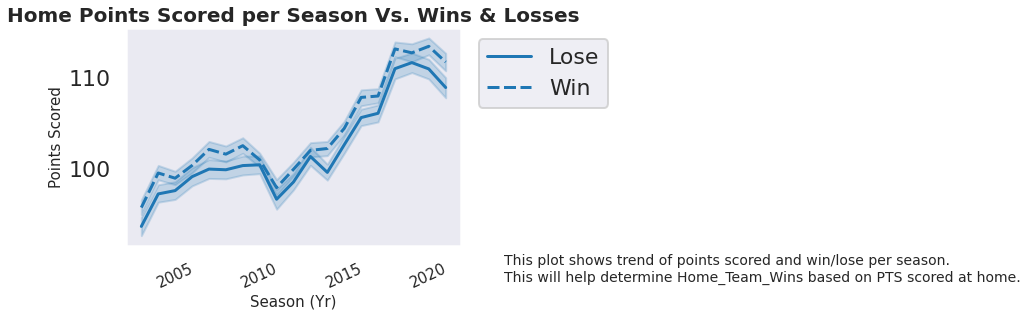

In [25]:
##Presentation #3 - Home Points and Win Lose Synergy
sns.axes_style("darkgrid")
sns.lineplot(data=sorted_teams, x="SEASON", y="PTS_home", style="HOME_TEAM_WINS")
plt.xticks(rotation = 80, fontsize = 12)
plt.xlabel('Season (Yr)', fontsize = 15)
plt.xticks(rotation = 25, fontsize = 15)
plt.ylabel('Points Scored', fontsize = 15)
plt.title('Home Points Scored per Season Vs. Wins & Losses',  fontsize = 20, fontweight='bold')
plt.legend(labels=['Lose','Win'],
           bbox_to_anchor=(1.02, 1))
plt.figtext(1, 0, "This plot shows trend of points scored and win/lose per season. \nThis will help determine Home_Team_Wins based on PTS scored at home.", fontsize=14)
plt.savefig('nba_trends.jpg')
plt.tight_layout;

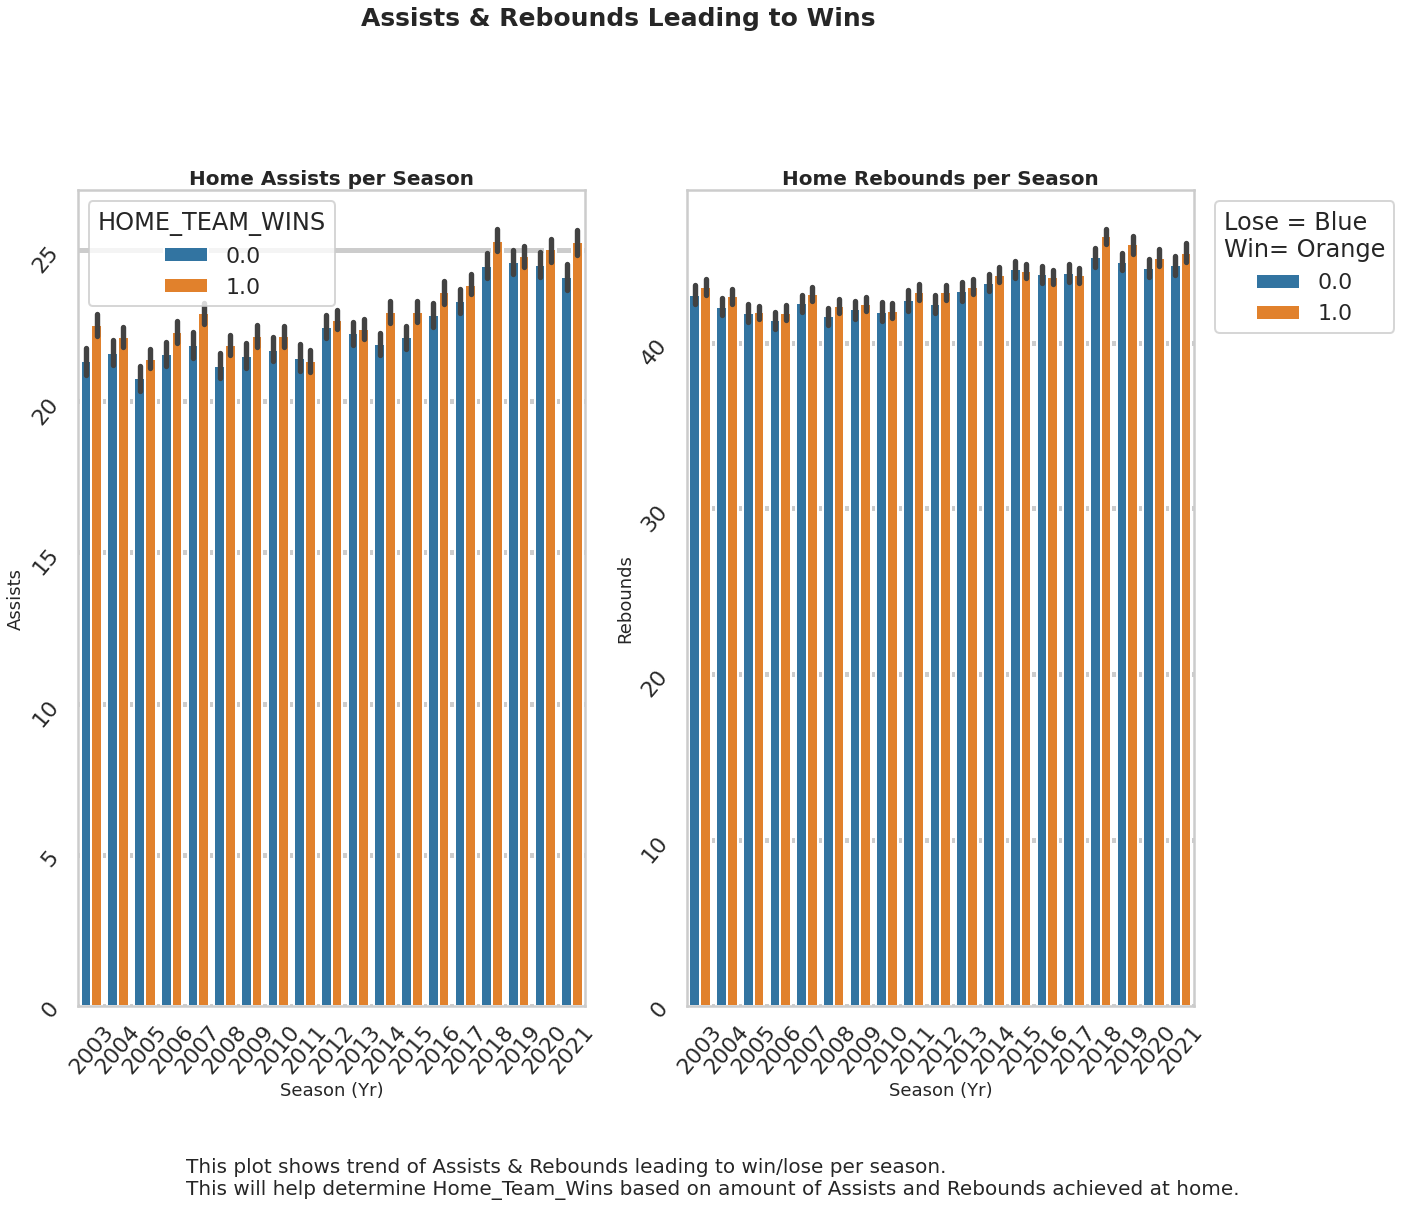

In [26]:
#Presentation #4 - Ast. Reb. Leading to Wins
sns.set_style("whitegrid")
fig, axes = plt.subplots(ncols=2, figsize=(20,15))
for ax in fig.axes:
    ax.tick_params(labelrotation=50)

sns.barplot(x="SEASON", y="AST_home", hue="HOME_TEAM_WINS", data=sorted_teams, ax=axes[0])
axes[0].set_xlabel('Season (Yr)', fontsize = 18)
axes[0].set_ylabel('Assists', fontsize = 18)
axes[0].set_title('Home Assists per Season',  fontsize = 20, fontweight='bold')
plt.legend(title='Home Team Wins', labels=['Lose','Win'], bbox_to_anchor=(1.02, 1))

sns.barplot(x="SEASON", y="REB_home", hue="HOME_TEAM_WINS", data=sorted_teams, ax=axes[1])
axes[1].set_xlabel('Season (Yr)', fontsize = 18)
axes[1].set_ylabel('Rebounds', fontsize = 18)
axes[1].set_title('Home Rebounds per Season',  fontsize = 20, fontweight='bold')
plt.title("Home Rebounds per Season", fontsize = 20, fontweight='bold')

plt.legend(title='Lose = Blue \nWin= Orange', bbox_to_anchor=(1.02, 1))
fig.suptitle('Assists & Rebounds Leading to Wins', fontsize = 25, fontweight = 'bold', y=1.05)

plt.figtext(0.2, -0.05, "This plot shows trend of Assists & Rebounds leading to win/lose per season. \nThis will help determine Home_Team_Wins based on amount of Assists and Rebounds achieved at home.", fontsize=20)
plt.tight_layout;

##Preparing Data for Machine Learning:

In [27]:
##instantiate X, y and train test split
X = sorted_teams.drop(columns= 'HOME_TEAM_WINS')
y = sorted_teams['HOME_TEAM_WINS']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
#looking at shape
X_train.shape

(19250, 15)

In [29]:
#looking at X_train data
X_train

GAME_DATE_EST  HOME_TEAM_ID  SEASON  PTS_home  FG_PCT_home  FT_PCT_home  \
7115     2011-12-26    1610612756    2011      84.0        0.395        0.789   
930      2021-10-30    1610612744    2021     103.0        0.424        0.500   
9134     2010-02-08    1610612747    2009     101.0        0.437        0.731   
61       2022-03-04    1610612764    2021     114.0        0.541        0.889   
23662    2016-01-18    1610612742    2015     118.0        0.430        0.917   
...             ...           ...     ...       ...          ...          ...   
14592    2006-03-19    1610612764    2005     113.0        0.469        0.857   
13920    2006-12-01    1610612757    2006      89.0        0.410        0.767   
1841     2021-02-26    1610612748    2020     124.0        0.512        0.880   
9249     2010-01-23    1610612749    2009     127.0        0.570        0.857   
25581    2014-11-11    1610612761    2014     104.0        0.455        0.833   

       FG3_PCT_home  AST_home  REB_home  PTS_away  FG_PCT_away  FG3_PCT_away  \
7115          0.200      23.0      45.0      85.0        0.443         0.125   
930           0.389      30.0      56.0      82.0        0.349         0.205   
9134          0.429      20.0      45.0      89.0        0.427         0.333   
61            0.483      37.0      41.0     117.0        0.418         0.361   
23662         0.471      23.0      51.0     113.0        0.426         0.400   
...             ...       ...       ...       ...          ...           ...   
14592         0.389      17.0      41.0     104.0        0.494         0.556   
13920         0.125      17.0      42.0      91.0        0.493         0.273   
1841          0.452      24.0      50.0     116.0        0.426         0.326   
9249          0.478      36.0      45.0      94.0        0.384         0.154   
25581         0.429      16.0      40.0     100.0        0.481         0.480   

       AST_away  REB_away  GAME_month  
7115       10.0      47.0          12  
930        14.0      45.0          10  
9134       17.0      42.0           2  
61         18.0      39.0           3  
23662      24.0      49.0           1  
...         ...       ...         ...  
14592      15.0      37.0           3  
13920      22.0      41.0          12  
1841       24.0      36.0           2  
9249       15.0      37.0           1  
25581      26.0      39.0          11  

[19250 rows x 15 columns]

In [30]:
#loooking at NaN is train data, need to clean without leaking
X_train.isna().sum()

GAME_DATE_EST    0
HOME_TEAM_ID     0
SEASON           0
PTS_home         0
FG_PCT_home      0
FT_PCT_home      0
FG3_PCT_home     0
AST_home         0
REB_home         0
PTS_away         0
FG_PCT_away      0
FG3_PCT_away     0
AST_away         0
REB_away         0
GAME_month       0
dtype: int64

In [31]:
#instantiate num selector
num_selector = make_column_selector(dtype_include='number')

In [32]:
#instantiate scaler
scaler = StandardScaler()

In [33]:
#instantiate mean imputer
mean_imputer = SimpleImputer(strategy='mean')

In [34]:
#making number pipeline
number_pipeline = make_pipeline(scaler, mean_imputer)
number_pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('simpleimputer', SimpleImputer())])

In [35]:
# Tuples for Numbers 
number_tuple = (number_pipeline, num_selector)

In [36]:
#column transformer with preprocessing columns
preprocessing = make_column_transformer(number_tuple)
preprocessing

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe2f9d1e3d0>)])

In [37]:
#fitting to x_train data
preprocessing.fit(X_train)

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe2f9d1e3d0>)])

In [38]:
#fiting and transforming x train and x test
X_train_processed = preprocessing.fit_transform(X_train)
X_test_processed = preprocessing.fit_transform(X_test)

In [39]:
#Printing data for validation
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (19250, 14)




array([[ 0.53002284, -0.14762923, -1.45166846, ..., -2.21980374,
         0.75639377,  1.40327519],
       [-0.85896689,  1.71210682, -0.00449484, ..., -1.44255093,
         0.4490367 ,  0.94259256],
       [-0.51171946, -0.51957644, -0.15682891, ..., -0.85961132,
        -0.0119989 , -0.90013796],
       ...,
       [-0.39597031,  1.52613322,  1.59501284, ...,  0.50058109,
        -0.93407011, -0.90013796],
       [-0.28022117, -0.51957644,  1.82351393, ..., -1.24823773,
        -0.78039157, -1.13047928],
       [ 1.10876855,  0.41029159,  0.07167219, ...,  0.8892075 ,
        -0.4730345 ,  1.17293388]])

## Using PCA for the Supervised Machine Learning: With and Without Models

##Logistic Regression with PCA Model 1:

In [40]:
# Creating transformer pipeline for pca at 80%
pca_transformer = make_pipeline(StandardScaler(), PCA(n_components=0.95))

In [41]:
logreg = LogisticRegression(random_state=42)
# Creating a modeling pipeline
pca_logreg_pipe = make_pipeline(pca_transformer, logreg)

In [42]:
pca_logreg_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.95))])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [43]:
pca_logreg_train_pred = pca_logreg_pipe.predict(X_train_processed)
pca_logreg_test_pred = pca_logreg_pipe.predict(X_test_processed)

In [44]:
print("1st Results of Testing Data: PCA Log Reg No Tuning")
print('Training accuracy:', pca_logreg_pipe.score(X_train_processed, y_train))
print('Testing accuracy:', pca_logreg_pipe.score(X_test_processed, y_test))

1st Results of Testing Data: PCA Log Reg No Tuning
Training accuracy: 0.5882597402597403
Testing accuracy: 0.5980988000623344


In [45]:
#Getting precision_score, recall_score, f1_score for pca log_reg
pca_logreg_precision_score = precision_score(y_test, pca_logreg_test_pred, average=None)
pca_logreg_recall_score = recall_score(y_test, pca_logreg_test_pred, average=None)
pca_logreg_f1_score = f1_score(y_test, pca_logreg_test_pred, average=None)


print("2nd Results of Testing Data: PCA Log Reg No Tuning")
print("Precision score:", pca_logreg_precision_score)
print("Recall score:", pca_logreg_recall_score)
print("F1 score:", pca_logreg_f1_score)


2nd Results of Testing Data: PCA Log Reg No Tuning
Precision score: [0.52348993 0.60368509]
Recall score: [0.09       0.94419701]
F1 score: [0.1535937  0.73648718]


##Tuning Logistic Regression with PCA Model 1:

{0.0001: 0.4051737572074178,
 0.001: 0.5931120461274739,
 0.01: 0.5985663082437276,
 0.1: 0.5988779803646563,
 0.2: 0.5985663082437276,
 1: 0.5980988000623344,
 10: 0.5980988000623344,
 100: 0.5982546361227988,
 1000: 0.5982546361227988}

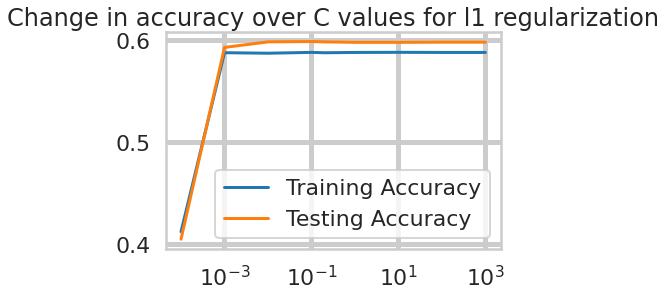

In [46]:
# create a list of c values and empty lists for check scores
c_values = [0.0001, 0.001, 0.01, 0.1, 0.2, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data with penalty L1
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(pca_transformer, log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}


{0.0001: 0.5884369643135422,
 0.001: 0.5974754558204769,
 0.01: 0.5982546361227988,
 0.1: 0.5982546361227988,
 1: 0.5982546361227988,
 10: 0.5982546361227988,
 100: 0.5982546361227988,
 1000: 0.5982546361227988}

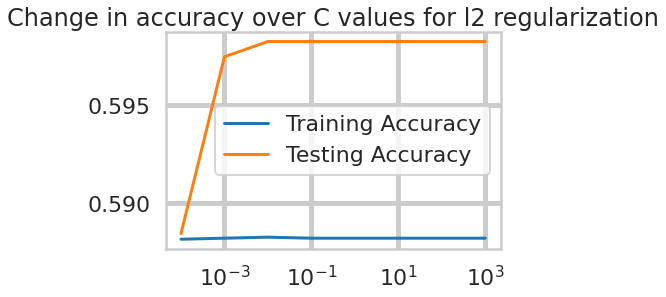

In [47]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data with penalty l2
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(pca_transformer, log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}


In [48]:
#Based on above exploratory these are best parameters for tuned model
tun_logreg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=1000)
# Creating a tune modeling pipeline
tun_pca_logreg_pipe = make_pipeline(pca_transformer, tun_logreg)

In [49]:
tun_pca_logreg_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.95))])),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

In [50]:
tun_pca_logreg_train_pred = tun_pca_logreg_pipe.predict(X_train_processed)
tun_pca_logreg_test_pred = tun_pca_logreg_pipe.predict(X_test_processed)

In [51]:
print("1st Results of Testing Data: Tuned PCA Log Reg")
print('Training accuracy:', tun_pca_logreg_pipe.score(X_train_processed, y_train))
print('Testing accuracy:', tun_pca_logreg_pipe.score(X_test_processed, y_test))

1st Results of Testing Data: Tuned PCA Log Reg
Training accuracy: 0.5882597402597403
Testing accuracy: 0.5988779803646563


In [52]:
#Getting precision_score, recall_score, f1_score for tuned pca log_reg
tun_pca_logreg_precision_score = precision_score(y_test, tun_pca_logreg_test_pred, average=None)
tun_pca_logreg_recall_score = recall_score(y_test, tun_pca_logreg_test_pred, average=None)
tun_pca_logreg_f1_score = f1_score(y_test, tun_pca_logreg_test_pred, average=None)


print("2nd Results of Testing Data: Tuned PCA Log Reg")
print("Precision score:", tun_pca_logreg_precision_score)
print("Recall score:", tun_pca_logreg_recall_score)
print("F1 score:", tun_pca_logreg_f1_score)


2nd Results of Testing Data: Tuned PCA Log Reg
Precision score: [0.52995392 0.60387765]
Recall score: [0.08846154 0.94655489]
F1 score: [0.15161503 0.73734694]


##Logistic Regression Model 2:
- no PCA

In [53]:
#making pipeline for log reg normal
log_reg_pipe = make_pipeline(StandardScaler(), log_reg)

In [54]:
#Fitting log reg model to training data
log_reg_pipe.fit(X_train_processed,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1000, max_iter=1000,
                                    solver='liblinear'))])

In [55]:
#Making predictions using the train and testing data.
logreg_train_pred = log_reg_pipe.predict(X_train_processed)
logreg_test_pred = log_reg_pipe.predict(X_test_processed)

In [56]:
print("1st Results of Testing Data: Normal Log Reg")
print('Training accuracy:', log_reg_pipe.score(X_train_processed, y_train))
print('Testing accuracy:', log_reg_pipe.score(X_test_processed, y_test))

1st Results of Testing Data: Normal Log Reg
Training accuracy: 0.5914805194805195
Testing accuracy: 0.5982546361227988


In [57]:
#Getting precision_score, recall_score, f1_score for normal log_reg
logreg_precision_score = precision_score(y_test, logreg_test_pred, average=None)
logreg_recall_score = recall_score(y_test, logreg_test_pred, average=None)
logreg_f1_score = f1_score(y_test, logreg_test_pred, average=None)


print("2nd Results of Testing Data: Normal Log Reg")
print("Precision score:", logreg_precision_score)
print("Recall score:", logreg_recall_score)
print("F1 score:", logreg_f1_score)


2nd Results of Testing Data: Normal Log Reg
Precision score: [0.51992754 0.6056266 ]
Recall score: [0.11038462 0.93057375]
F1 score: [0.1821066 0.7337327]


##Tuning Logistic Regression Model 2:

- no PCA

{0.0001: 0.4051737572074178,
 0.001: 0.5948262427925822,
 0.01: 0.5974754558204769,
 0.1: 0.6002805049088359,
 1: 0.5985663082437276,
 10: 0.5982546361227988,
 100: 0.5982546361227988,
 1000: 0.5982546361227988}

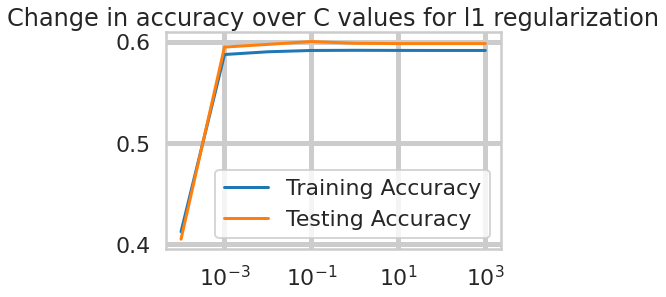

In [58]:
#testing hyper parameters
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data with penalty L1
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(StandardScaler(), log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

#Looks best ar c=0.01 with penalty= l1

{0.0001: 0.5901511609786505,
 0.001: 0.5996571606669784,
 0.01: 0.6004363409693003,
 0.1: 0.5984104721832632,
 1: 0.5982546361227988,
 10: 0.5982546361227988,
 100: 0.5982546361227988,
 1000: 0.5982546361227988}

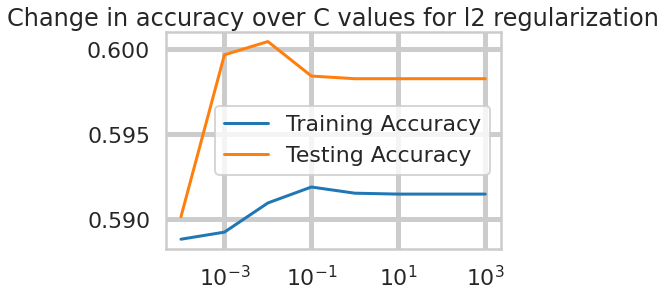

In [59]:
#testing hyper parameter 2
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for c in c_values:
  # instantiate a model with each value of c and fit it on the data with penalty l2
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(StandardScaler(), log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()

ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

#this shows penalty l2 does not have a higher accuracy score than above test with penalty l1

In [60]:
#tuned log reg
tun_log_reg = LogisticRegression(C=0.1, max_iter=1000, solver='liblinear', penalty='l1')

In [61]:
#making pipeline for tuned log reg 
tun_log_reg_pipe = make_pipeline(StandardScaler(), tun_log_reg)

In [62]:
#Fitting tun log reg model to training data
tun_log_reg_pipe.fit(X_train_processed,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

In [63]:
#Making predictions using the train and testing data.
tun_logreg_train_pred = tun_log_reg_pipe.predict(X_train_processed)
tun_logreg_test_pred = tun_log_reg_pipe.predict(X_test_processed)

In [64]:
print("1st Results of Testing Data: Tuned Log Reg")
print('Training accuracy:', tun_log_reg_pipe.score(X_train_processed, y_train))
print('Testing accuracy:', tun_log_reg_pipe.score(X_test_processed, y_test))

1st Results of Testing Data: Tuned Log Reg
Training accuracy: 0.5914805194805195
Testing accuracy: 0.6002805049088359


In [65]:
#Getting precision_score, recall_score, f1_score for tuned log_reg
tun_logreg_precision_score = precision_score(y_test, tun_logreg_test_pred, average=None)
tun_logreg_recall_score = recall_score(y_test, tun_logreg_test_pred, average=None)
tun_logreg_f1_score = f1_score(y_test, tun_logreg_test_pred, average=None)


print("2nd Results of Testing Data: Tuned Log Reg")
print("Precision score:", tun_logreg_precision_score)
print("Recall score:", tun_logreg_recall_score)
print("F1 score:", tun_logreg_f1_score)


2nd Results of Testing Data: Tuned Log Reg
Precision score: [0.53320683 0.60628183]
Recall score: [0.10807692 0.93555148]
F1 score: [0.17972498 0.7357577 ]


In [66]:
#Using GridSearch Randomized search on hyper parameters for Logistic Reg
model = LogisticRegression(random_state=42)
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'class_weight': ['balanced'],
             'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], 'penalty': ['l1', 'l2'] }

grid_search = GridSearchCV(model, param_grid)
grid_search.fit(X_train_processed, y_train)
grid_search.best_params_
best_model = grid_search.best_estimator_
 
#refit the model on the whole training set
best_model.fit(X_train_processed, y_train)
#score the model on the test set
best_model.score(X_test_processed, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

0.5948262427925822

##Decision Tree Classifier with PCA Model 3:

In [67]:
#instantiate decision tree
dec_tree = DecisionTreeClassifier(random_state = 42)

In [68]:
# Creating a modeling pipeline
pca_dectree_pipe = make_pipeline(pca_transformer, dec_tree) 

In [69]:
#fitting dectree with pca
pca_dectree_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.95))])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [70]:
#model predict
pca_dectree_train_pred = pca_dectree_pipe.predict(X_train_processed)
pca_dectree_test_pred = pca_dectree_pipe.predict(X_test_processed)

In [71]:
print("1st Results of Testing Data: PCA Dec Tree No Tuning")
print('Training accuracy:', pca_dectree_pipe.score(X_train_processed, y_train))
print('Testing accuracy:', pca_dectree_pipe.score(X_test_processed, y_test))

1st Results of Testing Data: PCA Dec Tree No Tuning
Training accuracy: 0.9995324675324675
Testing accuracy: 0.5169082125603864


In [72]:
#Getting precision_score, recall_score, f1_score for pca dec_tree
pca_dectree_precision_score = precision_score(y_test, pca_dectree_test_pred, average=None)
pca_dectree_recall_score = recall_score(y_test, pca_dectree_test_pred, average=None)
pca_dectree_f1_score = f1_score(y_test, pca_dectree_test_pred, average=None)


print("2nd Results of Testing Data: PCA Dec Tree No Tuning")
print("Precision score:", pca_dectree_precision_score)
print("Recall score:", pca_dectree_recall_score)
print("F1 score:", pca_dectree_f1_score)


2nd Results of Testing Data: PCA Dec Tree No Tuning
Precision score: [0.40747594 0.59650067]
Recall score: [0.42346154 0.58056065]
F1 score: [0.41531498 0.58842273]


##Tuning Decision Tree Classifier with PCA Model 3:

In [73]:
#Tuned dec tree
tun_dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=2)

In [74]:
# Creating a modeling pipeline
pca_tun_dectree_pipe = make_pipeline(pca_transformer, tun_dec_tree) 

In [75]:
#fitting tuned dectree with pca
pca_tun_dectree_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.95))])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2, random_state=42))])

In [76]:
#model predict with changes
pca_tun_dectree_train_pred = pca_tun_dectree_pipe.predict(X_train_processed)
pca_tun_dectree_test_pred = pca_tun_dectree_pipe.predict(X_test_processed)

In [77]:
print("1st Results of Testing Data: PCA Tuned Dec Tree")
print('Training accuracy:', pca_tun_dectree_pipe.score(X_train_processed, y_train))
print('Testing accuracy:', pca_tun_dectree_pipe.score(X_test_processed, y_test))

1st Results of Testing Data: PCA Tuned Dec Tree
Training accuracy: 0.5874805194805195
Testing accuracy: 0.5948262427925822


In [78]:
#Getting precision_score, recall_score, f1_score for tuned pca dec_tree
tun_pca_dectree_precision_score = precision_score(y_test, pca_tun_dectree_test_pred, average=None)
tun_pca_dectree_recall_score = recall_score(y_test, pca_tun_dectree_test_pred, average=None)
tun_pca_dectree_f1_score = f1_score(y_test, pca_tun_dectree_test_pred, average=None)


print("2nd Results of Testing Data: PCA Tuned Dec Tree")
print("Precision score:", tun_pca_dectree_precision_score)
print("Recall score:", tun_pca_dectree_recall_score)
print("F1 score:", tun_pca_dectree_f1_score)


2nd Results of Testing Data: PCA Tuned Dec Tree
Precision score: [0.         0.59482624]
Recall score: [0. 1.]
F1 score: [0.         0.74594489]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Decision Tree Classifier Model 4:
- no pca

In [79]:
#making pipeline for sec tree normal
dec_tree_pipe = make_pipeline(StandardScaler(), dec_tree)

In [80]:
#fitting dec tree
dec_tree_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [81]:
#model predict with normal
dectree_train_pred = dec_tree_pipe.predict(X_train_processed)
dectree_test_pred = dec_tree_pipe.predict(X_test_processed)

In [82]:
#checking accuracy
print("1st Results of Testing Data: Normal Dec Tree")
print('Training accuracy:', dec_tree_pipe.score(X_train_processed, y_train))
print('Testing accuracy:', dec_tree_pipe.score(X_test_processed, y_test))

1st Results of Testing Data: Normal Dec Tree
Training accuracy: 0.9995324675324675
Testing accuracy: 0.5220508025557113


In [83]:
#Getting precision_score, recall_score, f1_score for normal dec_tree
dectree_precision_score = precision_score(y_test, dectree_test_pred, average=None)
dectree_recall_score = recall_score(y_test, dectree_test_pred, average=None)
dectree_f1_score = f1_score(y_test, dectree_test_pred, average=None)


print("2nd Results of Testing Data: Normal Dec Tree")
print("Precision score:", dectree_precision_score)
print("Recall score:", dectree_recall_score)
print("F1 score:", dectree_f1_score)


2nd Results of Testing Data: Normal Dec Tree
Precision score: [0.41335807 0.60075228]
Recall score: [0.42846154 0.58580037]
F1 score: [0.42077432 0.59318212]


##Tuning Decision Tree Classifier Model 4:
- no pca

In [84]:
#Tuned dec tree 2nd time for Normal dec tree
Scnd_tun_dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=2)

In [85]:
# Creating a modeling pipeline fir tuned dec tree
tun_dectree_pipe = make_pipeline(StandardScaler(), Scnd_tun_dec_tree) 

In [86]:
#fitting tuned dec tree
tun_dectree_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2, random_state=42))])

In [87]:
#model predict with tuned parameters
tun_dectree_train_pred = tun_dectree_pipe.predict(X_train_processed)
tun_dectree_test_pred = tun_dectree_pipe.predict(X_test_processed)

In [88]:
#checking accuracy
print("1st Results of Testing Data: Tuned Dec Tree")
print('Training accuracy:', tun_dectree_pipe.score(X_train_processed, y_train))
print('Testing accuracy:', tun_dectree_pipe.score(X_test_processed, y_test))

1st Results of Testing Data: Tuned Dec Tree
Training accuracy: 0.5874805194805195
Testing accuracy: 0.5948262427925822


In [89]:
#Getting precision_score, recall_score, f1_score for tuned dec_tree
tun_dectree_precision_score = precision_score(y_test, tun_dectree_test_pred, average=None)
tun_dectree_recall_score = recall_score(y_test, tun_dectree_test_pred, average=None)
tun_dectree_f1_score = f1_score(y_test, tun_dectree_test_pred, average=None)


print("2nd Results of Testing Data: Tuned Dec Tree")
print("Precision score:", tun_dectree_precision_score)
print("Recall score:", tun_dectree_recall_score)
print("F1 score:", tun_dectree_f1_score)


2nd Results of Testing Data: Tuned Dec Tree
Precision score: [0.         0.59482624]
Recall score: [0. 1.]
F1 score: [0.         0.74594489]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
#Using GridSearch Randomized search on hyper parameters for Decision Tree
dec_model = DecisionTreeClassifier(random_state=42)
dec_param_grid = {'max_depth': range(2,20), 'min_samples_leaf': [1, 2, 3],
                'min_samples_split': [2, 4, 6], 'splitter': ['best']}

dec_grid_search = GridSearchCV(dec_model, dec_param_grid)
dec_grid_search.fit(X_train_processed, y_train)
dec_grid_search.best_params_
dec_best_model = dec_grid_search.best_estimator_
 
#refit the model on the whole training set
dec_best_model.fit(X_train_processed, y_train)
#score the model on the test set
dec_best_model.score(X_test_processed, y_test)

0.5942028985507246

##Evaluating Model Performance: 
- Examining the appropriate metrics.
- Choosing the "production" model and justify this decision.

All of the 4 different models (Logistic Regression & Decision Tree Classifier) with and without Principal Component Analisis (PCA) tested very well on the data set. Especially since it is predicting an actual future outcome from past game statistics, which is Home Team Wins. This was done by grouping data by Home Team ID and sorting by Game Date. After doing that the target data was shifted down. This made the model have to use current game statistics to predict the next game possibility to Home Team Win.

Metrics to evaluate models and find the best model included Accuracy, Precision, Recall, F1 Score, and Grid Search CV. Accuracy is the number of correct predictions over all predictions. Precision is measuring how many of the positive predictions made are correct. Recall measures how many of the positive cases the classifier correctly predicted, over all the positive cases in the data. F1 Score is measuring both precision and recall and creating harmonic average. 

- The Decision Tree Classifier model with PCA and no tuning did the worst overall with Accuracy on the testing data getting 51.69%, which is almost a coinflip. The F1 score of the model was 58.84% and that is not that great. 

- The next lowest model is the Decision Tree Classifier model with no PCA and no tuning. The model's Accuracy was 52.20% and F1 score was 59.31%. This is a slight increase from the previous model but still was not predicted well enough.

- The model that did the second best was the Logistic Regression with PCA and tuning of hyperparameters. The accuracy on the testing data was 59.88%, which is a nice increase. The F1 score was also high, being 73.73% and the Recall was amazing being 94.65%. This means that this model was able to correctly predict 94.65% of wins in the Home Team Wins target.

- The best model out of my analysis was the tuned Logistic Regression with no PCA. Slight tuning of each model hyperparameters was able to increase data prediction accuracy and lower overfitting of the data. The accuracy on the testing data had a little increase over the previous model and was 60.02%. The F1 score was slightly lower than the previous model with 73.57%, also the Recall was slightly lower at 93.55%. However, the small increase in Accuracy made-up for this. 

In addition, Grid Search CV was also used on Logistic Regression and Decision Tree Classifier models without PCA. The Grid Search did not do as great as anticipated due to the difficulty in predicting this type of data.

- For the Logistic Regression, the parameters were C, Class Weight, Solver, and Penalty. The inputs for C were between 0.0001 and 1000. The input for Class Weight was 'balanced'. The inputs for Solver were 'liblinear', 'newton-cg', 'lbfgs', 'sag', and 'saga'. The Penalties were 'l1' and 'l2'. 
Grid Search found the best parameters and was able to get an Accuracy of 59.48%.

- For the Decision Tree Classifier, the parameters were Max Depth, Min Samples Leaf, Min Samples Split, and Splitter. The inputs for Max Depth were between 2 and 20. The inputs for Min Samples Leaf were 1, 2, and 3. The inputs for Min Samples Split were 2, 4, and 6. The input for Splitter was 'best'. With these parameters and inputs, Grid Search found the best Accuracy to be 59.42%. 

From the information above, Logistic Regression slightly outperformed Decision Tree Classifier using Grid Search. Many changes can be made to parameters or inputs to increase Accuracy but the cost may be CPU performance. A recommendation for future models with this type of prediction, would be to utilize Randomized Search CV. This would help in finding the best hyperparameters and inputs for the most accurate possible prediction of Home Team Win.  
